<a href="https://colab.research.google.com/github/emichester/03MIAR_Algoritmos_de_Optimizacion/blob/main/AG2/Algoritmos_Emilio_Jes%C3%BAs_Hernandez_Salas_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 2
# Emilio Jesús Hernández Salas

- Link repositorio de GitHub: [03MIAR_Algoritmos_de_Optimizacion](https://github.com/emichester/03MIAR_Algoritmos_de_Optimizacion)

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Caso: una sola variable

- https://es.wikipedia.org/wiki/Derivaci%C3%B3n_num%C3%A9rica

Definimos una función $f : \Re \rightarrow \Re$ : $f(x) = x^2$

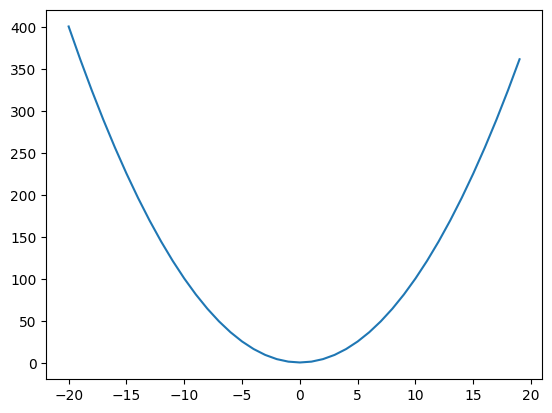

In [36]:
X = np.array([i for i in range(-20,20)])
f = lambda x: x**2+1
Y = f(X)
plt.plot(X,Y)
plt.show()

Definimos las derivadas numéricas, de tal forma que la aproximación central de la primera derivada se puede expresar de la siguiente forma:

$
f'(x) = \frac{df(x)}{dx} \approx \lim_{h \to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}
$

Y la aproximación central de la segunda derivada como:

$
f''(x) = \frac{d^2f(x)}{dx^2} \approx \lim_{h \to 0} \frac{f(x_0+h)-2f(x0)-f(x_0-h)}{h^2}
$

Tomando $h$ muy pequeño tenemos:

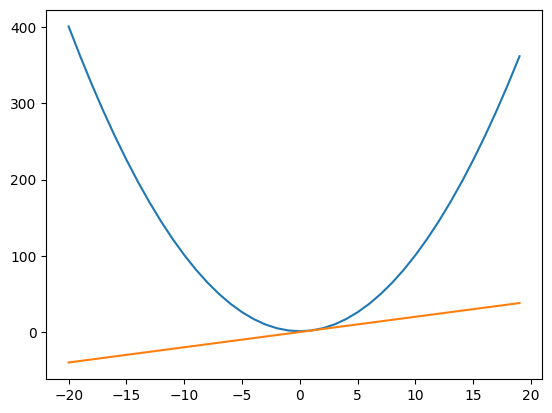

In [37]:
fp = lambda x0,h: (f(x0+h)-f(x0-h))/(2*h)
fpp = lambda x0,h: (f(x0+h)-2*f(x0)-f(x0-h))/(h**2)
plt.subplots(1)
plt.plot(X,f(X))
plt.plot(X,fp(X,0.0001))
plt.show()

Ahora bien, tenemos que el descenso del gradiente para una sola variable se define como:

$x_{n+1} = x_n - \gamma_n f'(x_n)$

donde, en el caso del método de newton tenemos que

$
\gamma_n = \frac{1}{f''(x_n)}
$

Tomando $\gamma_n = 0.01 → 0$ tenemos que

Iteración 78, punto mínimo: x = 0.0008496230575718577 con valor f(x) = 1.0000007218593399


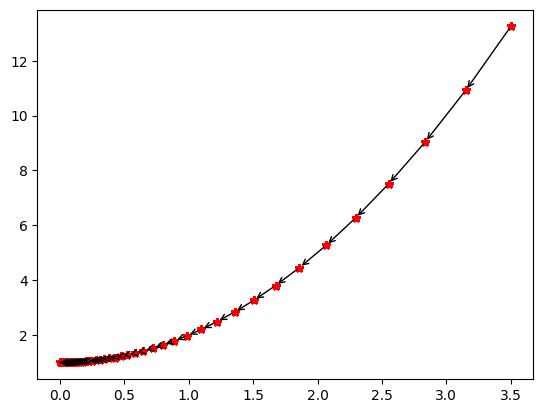

In [43]:
x0 = 3.5
x = x0
h = 0.0001
lr = 0.05
error = 0.0001
fix, ax = plt.subplots(1)
X = [x]
Y = [f(x)]
for i in range(100):
    x = x0 - lr*fp(x0,h)
    ax.annotate("", xy=(X[-1], Y[-1]), xytext=(x, f(x)),
                arrowprops=dict(arrowstyle="<-"))
    X.append(x)
    Y.append(f(x))
    ax.plot(X,Y, 'r*')
    if np.abs(x-x0) <= error:
        break
    else:
        x0 = x

print(f"Iteración {i}, punto mínimo: x = {x} con valor f(x) = {f(x)}")

## Caso: dos variables

- https://construyendoachispas.blog/2018/01/15/metaheuristicas-derivada-numerica-y-gradiente/
- https://www.unioviedo.es/compnum/labs/lab07_der_int/lab07_der_int.html
- https://plotly.com/python/3d-surface-plots/
- https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

Definimos la función que vamos a usar:

$
f(x,y) = x^2 + y^2
$

In [45]:
f2 = lambda x,y: x**2+y**2
# f2 = lambda x,y: np.cos(x)*np.sin(y)
# f2 = lambda x,y: x**2+y**2+x*y*(x+y)

Sabemos que esta función concretamente tiene un mínimo global en el punto $(x_c,y_c) = (0,0)$. Podemos observarla en el siguiente gráfico:

In [46]:
X = np.linspace(-5, 5, 101)
Y = np.linspace(-5, 5, 101)
# full coordinate arrays
XX, YY = np.meshgrid(X, Y)
ZZ = f2(XX,YY)

fig = go.Figure(data=[go.Surface(z=ZZ, x=XX, y=YY)])

fig.update_layout(title='Test', autosize=False)

fig.show()

A continuación definimos las aproximaciones numéricas de la derivada, de tal forma que

$
f_x'(x,y) = \frac{\partial f(x,y)}{\partial x} = \frac{f(x+h,y)-f(x-h,y)}{2h}
$

y

$
f_y'(x,y) = \frac{\partial f(x,y)}{\partial y} = \frac{f(x,y+h)-f(x,y-h)}{2h}
$

así, finalmente tenemos

$
\nabla f(x,y) = \left[ f_x'(x,y) , f_y'(x,y) \right]
$

In [47]:
fp2_x = lambda x,y,h: (f2(x+h,y)-f2(x-h,y))/(2*h)
fp2_y = lambda x,y,h: (f2(x,y+h)-f2(x,y-h))/(2*h)
gradf2 = lambda x,y,h: np.array([fp2_x(x,y,h), fp2_y(x,y,h)])

A continuación definimos el método del descenso del gradiente de la siguiente forma

$
p_{n+1} = p_{n} - \gamma_n \nabla f (p_n)
$

In [49]:
p0 = (4,3)
p = p0
h = 0.0001
lr = 0.05
error = 0.001
for i in range(100):
    p = p0 - lr*gradf2(p[0],p[1],h)
    # definimos un criterio de parada
    if np.sqrt(np.dot(p,p0)) <= error:
        break
    else:
        p0 = p

print(f"Iteración: {i}, p_c: {p} y f(pc) = {f2(p[0],p[1])} \n con un lr de {lr} y un error de {error}")

Iteración: 81, p_c: [0.00070786 0.00053089] y f(pc) = 7.829094888180053e-07 
 con un lr de 0.05 y un error de 0.001


De esta forma vemos que si asumimos un error de 0.001 podemos afirmar que el punto crítico $(0,0) \pm 0.001$ es un mínimo de la función $f(x,y)$.

## Caso: Práctica para mejorar la nota

$
f(x,y) = sin(\frac{x^2}{2} - \frac{y^2}{4} +3) \cdot cos(2x +1 - e^y)
$

In [73]:
f2 = lambda x,y: np.sin(x**2/2 - y**2/4 + 3) * np.cos(2*x + 1 + np.exp(y))

In [74]:
X = np.linspace(-5, 5, 101)
Y = np.linspace(-5, 5, 101)
# full coordinate arrays
XX, YY = np.meshgrid(X, Y)
ZZ = f2(XX,YY)

fig = go.Figure(data=[go.Surface(z=ZZ, x=XX, y=YY)])

fig.update_layout(title='Test', autosize=False)

fig.show()

Iteración: 4999, p_c: [1.87510816 0.42720637] y f(pc) = -1.0 
 con un lr de 0.010093641863314363 y un error de 0.001


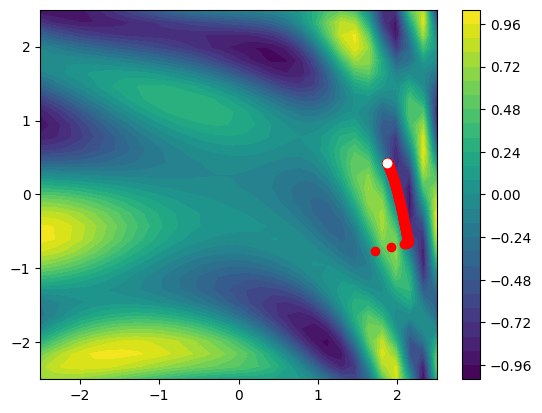

In [90]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion,resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[ix,iy] = f2(x,y)

fig, ax = plt.subplots(1)
# Pinta el mapa de niveles de Z
contour = ax.contourf(X,Y,Z,resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
p0 = [random.uniform(-rango,rango), random.uniform(-rango,rango)]
ax.plot(p0[0], p0[1], "ro")

p = p0
h = 0.0001
lr_ini = 0.1
lr = lr_ini
lr_thresh = 0.01
error = 0.001
for i in range(5000):
    p = p0 - lr*gradf2(p[0],p[1],h)
    ax.plot(p[0], p[1], "ro")
    #### print("Norma del gradiente: ", np.linalg.norm(gradf2(p[0],p[1],h)))
    # ajuste de la tasa de aprendizaje
    if lr > lr_thresh \
        and np.linalg.norm(gradf2(p[0],p[1],h)) < 1 \
        and lr_ini * np.linalg.norm(gradf2(p[0],p[1],h)) > lr_thresh:

        lr = lr_ini * np.linalg.norm(gradf2(p[0],p[1],h))
        # print(lr)
    # definimos un criterio de parada
    if np.sqrt(np.dot(p,p0)) <= error:
        break
    else:
        p0 = p

ax.plot(p[0], p[1], "wo")
print(f"Iteración: {i}, p_c: {p} y f(pc) = {f2(p[0],p[1])} \n con un lr de {lr} y un error de {error}")

Podemos decir que nos hemos acercado a un mínimo local de la función, pero no podemos afirmar que este sea un mínimo global.

## Resolución del profesor

In [76]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [77]:
f = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0] , 2*X[1]]

Solución p = [4.384827938803289e-24, -3.188991510338385e-23] 
 y f(x,y) = 1.0361934013539392e-45


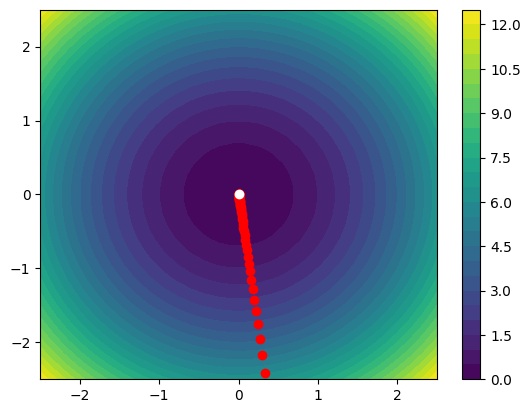

In [67]:
# Preparamos los datos para poder representar el mapa de niveles en Z
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion,resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[ix,iy] = f([x,y])

fig, ax = plt.subplots(1)
# Pinta el mapa de niveles de Z
contour = ax.contourf(X,Y,Z,resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango,rango), random.uniform(-rango,rango)]
ax.plot(P[0], P[1], "ro")

TA = 0.05

for _ in range(500):
    grad = df(P)
    P[0], P[1] = P[0]-TA*grad[0], P[1]-TA*grad[1]

    ax.plot(P[0], P[1], "ro")

ax.plot(P[0], P[1], "wo")

print(f"Solución p = {P} \n y f(x,y) = {f(P)}")

## Intento de descenso del gradiente en el caso $f : \Re^n \rightarrow \Re$

In [ ]:
# fn = lambda x,y,z: x**2+y**2+z**2

# X = np.linspace(-5, 5, 101)
# Y = np.linspace(-5, 5, 101)
# Z = np.linspace(-5, 5, 101)

# def gradfn(h,*args):
#     gr = []
#     for k, dim in enumerate(args):
#         gr.append(
#             ( fn(args[0:k],args[k]+h,args[k:]) - fn(args[0:k],args[k]-h,args[k:]) )/(2*h)
#         )

#     return np.array(gr)

# gradfn(0.0001,X,Y,Z)